# Introduction

This notebook shows method of classification using <b>k-nn</b> algorithm. Classifier will be evaluated using different hyperparameters (different metrics, k value and number of attributes).

## Dataset

The dataset used in notebook is <i>Hepatitis Data Set</i> from <i>UCI Machine Learning Repository</i>. Dataset describes patients with suspected hepatitis. Dataset contains 155 instances (rows) with 19 attributes (excluding class column), 32 of them are in DIE class and 123 are in LIVE class. DIE class represents instances of ill patient, and LIVE class represents healthy patient.

# Loading dataset

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np

column_names = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

data = pd.read_csv('hepatitis.data', delimiter=',', names=column_names)


# shows first 10 instances
data.head(10)

X = data.drop('Class', axis=1)
y = data['Class']

X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Inserting missing data

Dataset contains some missing data. Because dataset is relatively small, instances with missing data are not deleted from dataset. Missing data fields are filled with values computed using "most frequent value technique". 

In [16]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values='?', strategy='most_frequent')
imt = imr.fit(X)
X = pd.DataFrame(imr.transform(X), columns=X.columns)

X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,100,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,100,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# One-hot encoding

In [17]:
dummies = pd.get_dummies(X[['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'HISTOLOGY']])

X = pd.concat([X[['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']], dummies], axis=1)

# Feature selection

Feature selection were performed using filtering method with <i>chi-square</i> statistic as ranking score. Results of ranking are shown on figures below.

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

rank_range = 10

selector = SelectKBest(chi2, k=rank_range)

selector.fit(X, y)

# selected columns indexes
cols = selector.get_support(indices=True)

features_df_new = X.iloc[:,cols]
features_df_new

# sorting features (best to worst)
scores = selector.scores_
pvalues = selector.pvalues_
zipped_list = [[float(s), str(f), int(i), float(p)] for s, f, i, p in zip(scores, features_df_new.columns, cols, pvalues)]
zipped_list = sorted(zipped_list, key= lambda x: x[0], reverse=True)

# sorted features
zipped_list_scores = list(np.array(zipped_list)[:,0].astype(np.float))
zipped_list_columns = list(np.array(zipped_list)[:,1])
zipped_list_indexes = list(np.array(zipped_list)[:,2].astype(np.int))
zipped_list_pvalues = list(np.array(zipped_list)[:,3].astype(np.float))




# sorted DataFrame
X_sorted_df = features_df_new[zipped_list_columns]

# sorted np array
X_sorted_np = np.array(X_sorted_df)

# labels shortcuts
shortcut_array = [x[:3] for x in zipped_list_columns[:]]

X_sorted_df

,SGOT,MALAISE_1,ALK PHOSPHATE,BILIRUBIN,AGE,ASCITES_1,PROTIME,VARICES_1,HISTOLOGY_2,SPIDERS_1
0,18,0,85,1.00,30,0,100,0,0,0
1,42,0,135,0.90,50,0,100,0,0,0
2,32,0,96,0.70,78,0,100,0,0,0
3,52,0,46,0.70,31,0,80,0,0,0
4,200,0,85,1.00,34,0,100,0,0,0
...,...,...,...,...,...,...,...,...,...,...
150,242,1,85,7.60,46,1,50,1,1,1
151,142,0,126,0.90,44,0,100,0,1,0
152,20,1,75,0.80,61,0,100,0,1,1
153,19,0,81,1.50,53,0,48,1,1,1


<BarContainer object of 10 artists>

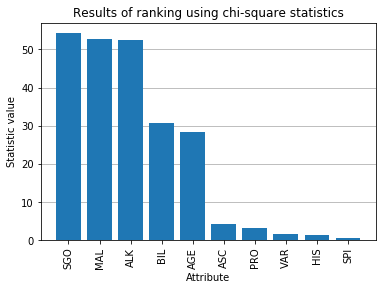

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.figure("Results of ranking using chi-square statistics")
plt.title("Results of ranking using chi-square statistics")


ypos = np.arange(len(zipped_list_columns))
plt.ylabel("Statistic value")
plt.xlabel("Attribute")
plt.grid(axis='y', zorder=0)
plt.xticks(ypos, shortcut_array, rotation="vertical")
plt.bar(ypos, zipped_list_scores, label="scores_", zorder=2)

<BarContainer object of 10 artists>

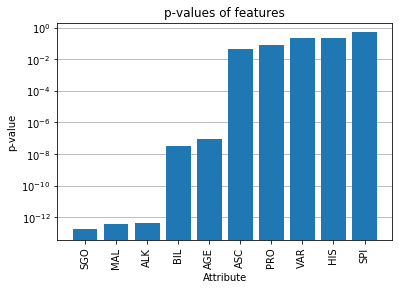

In [20]:
plt.figure("p-values of features")
plt.title("p-values of features")


plt.ylabel("p-value")
plt.xlabel("Attribute")
plt.grid(axis='y', zorder=0)
plt.xticks(ypos, shortcut_array, rotation="vertical")
plt.yscale('log')
plt.bar(ypos, zipped_list_pvalues, label="p-value", zorder=2)

# Data standardization

Data standardization were performed in order to scale all features and to increase classifier efficiency.

In [21]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

# Evaluation using 5x2 cross validation

Classifier evaluation were performed using "5x2 cross validation" method. Loops in code below, selects k parameter, metrics and number of features selected in feature selection section. Classifier parameters and its average score is stored in DataFrame table.

In [22]:
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

results = []

n_splits = 2

n_repeats = 5


for k in [1, 5, 10]:
    for metric in ['euclidean', 'minkowski']:
        
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
        
        for num_of_features in range(1, rank_range):
            
            iteration_score = 0
            
            X_sorted_np_std = stdsc.fit_transform(X_sorted_np[:,:num_of_features])
            
            splitted_data = rkf.split(X_sorted_np_std)
            
            for train_index, test_index in splitted_data:
                
                X_train, X_test = X_sorted_np_std[train_index], X_sorted_np_std[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                knn.fit(X_train, y_train)
                
                score = knn.score(X_test, y_test)
                
                
                iteration_score += (score / (n_splits*n_repeats))
            
            results.append([k, metric, num_of_features, iteration_score])
            
            

results_df = pd.DataFrame(results, columns=['k parameter', 'Metrics', 'Number of features', 'Score'])

results_df.to_csv("results.csv", sep=";")

In [23]:
results_df

,k parameter,Metrics,Number of features,Score
0,1,euclidean,1,0.672328
1,1,euclidean,2,0.674825
2,1,euclidean,3,0.707093
3,1,euclidean,4,0.709607
4,1,euclidean,5,0.729021
5,1,euclidean,6,0.741925
6,1,euclidean,7,0.767816
7,1,euclidean,8,0.803913
8,1,euclidean,9,0.793540
9,1,minkowski,1,0.677389


# Results

## Figures

Figures below shows how classifier efficiency changes with number of parameters and values of hyperparameters.

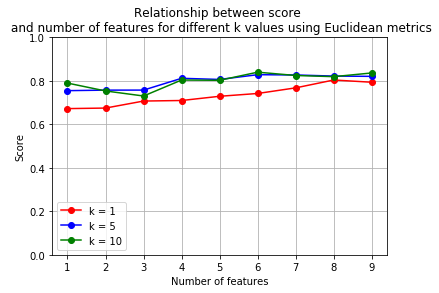

In [24]:
plt.figure("Relationship between score \n and number of features for different k values using Euclidean metrics")
plt.title("Relationship between score \n and number of features for different k values using Euclidean metrics")

plt.ylabel('Score')
plt.xlabel('Number of features')

plt.grid(zorder=0)

for col, k in zip(['red', 'blue', 'green'],[1, 5, 10]):
    plt.plot(np.arange(1,rank_range),
             results_df.loc[results_df['k parameter'] == k].loc[results_df['Metrics'] == 'euclidean']['Score'],
             marker='o', color=col, label=f"k = {k}")
plt.ylim(0,1)
plt.legend()
plt.show()

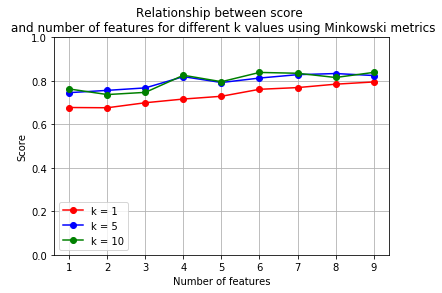

In [25]:
# Wykres zależności dokładności od liczby użytych cech dla różnych wartości k z metryką Minkowskiego

plt.figure("Relationship between score \n and number of features for different k values using Minkowski metrics")
plt.title("Relationship between score \n and number of features for different k values using Minkowski metrics")

plt.ylabel('Score')
plt.xlabel('Number of features')

plt.grid(zorder=0)

for col, k in zip(['red', 'blue', 'green'],[1, 5, 10]):
    plt.plot(np.arange(1,rank_range),
             results_df.loc[results_df['k parameter'] == k].loc[results_df['Metrics'] == 'minkowski']['Score'],
             marker='o', color=col, label=f"k = {k}")
plt.ylim(0,1)
plt.legend()
plt.show()

## Confusion matrix for best case

Confusion matrix was created for classifier with best score.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

best_score = results_df.loc[results_df['Score'] == max(results_df['Score'])]
print(f"Best score: {best_score}")

k_best = int(best_score['k parameter'])
metric_best = best_score['Metrics'].tolist()[0]
features_best = int(best_score['Number of features'])

best_knn = KNeighborsClassifier(n_neighbors=k_best, metric=metric_best)

X_best = stdsc.fit_transform(X_sorted_np[:,:features_best])

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.5, random_state=1, stratify=y)

best_knn.fit(X_train, y_train)

y_predicted = best_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Actual T', 'Actual F'], index=['Predicted T', 'Predicted F'])
conf_matrix_df

Best score:     k parameter    Metrics  Number of features     Score
41           10  euclidean                   6  0.839877


,Actual T,Actual F
Predicted T,5,11
Predicted F,0,62


# Conclusions

Score for best evaluated classifier equals ~84%. Sensitivity equals 100% and specificity is 84% - both based on confusion matrix. That means, classifier might be wrong when patient isn't ill, but for used dataset classifier never misses when patient is sick.

Classifier is most efficient for k parameter equal 10. Best value of k parameter was predictable even before 
experiment, because k value means how many neighbours are used to classify instance of dataset. In case od this dataset metrics were not as important for classifier efficiency as other parameters. Efficiency of classifier is getting higher with number of features used in classification.

Dataset contains only 155 instances, so model might be inefficient in tests with larger dataset.